In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv("data/stud.csv")
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.shape

(1000, 8)

In [ ]:
#checking for basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#checking for statistical summary
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#checkimg for missing value
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
#checking for duplicates value
data.duplicated().sum()

0

In [17]:
#checking for unique value
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [26]:
print("categories in gender", end=" ")
print(data["gender"].unique())

print("Categories in race-ethenicity",end=" ")
print(data["race_ethnicity"].unique())

print("categories in parental level",end=" ")
print(data["parental_level_of_education"].unique())

print("categories in lunch ",end=" ")
print(data["lunch"].unique())

print("Categories in test preperation",end=" ")
print(data["test_preparation_course"].unique())

categories in gender ['female' 'male']
Categories in race-ethenicity ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch  ['standard' 'free/reduced']
Categories in test preperation ['none' 'completed']


In [27]:
#defineing numerical and categorical feature
numeric_feature=[feature for feature in data.columns if data[feature].dtype != "O"]
categorical_feature=[feature for feature in data.columns if data[feature].dtype =="O"]

#print columns
print("we have {} numerical features : {}".format(len(numeric_feature),numeric_feature))
print("we have {} categorical features : {}".format(len(categorical_feature),categorical_feature))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [28]:
#adding column for "total Score" and "average"
data["total score"]=data["math_score"]+data["reading_score"]+data["writing_score"]
data["average"]=data["total score"]/3

In [29]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
#checking student having full marks
reading_full=data[data["reading_score"]==100]["average"].count()
writing_full=data[data["writing_score"]==100]["average"].count()
math_full=data[data["math_score"]==100]["average"].count()

print(f"Number of student having full marks in reading : {reading_full}")
print(f"Number of student having full marks in writing : {writing_full}")
print(f"Number of student having full marks in reading : {math_full}")

Number of student having full marks in reading : 17
Number of student having full marks in writing : 14
Number of student having full marks in reading : 7


In [36]:
#checking student having marks less than 20

reading_less_20=data[data["reading_score"]<=20]["average"].count()
writing_less_20=data[data["writing_score"]<=20]["average"].count()
math_less_20=data[data["math_score"]<=20]["average"].count()

print(f"Number of student having full marks in reading : {reading_less_20}")
print(f"Number of student having full marks in writing : {writing_less_20}")
print(f"Number of student having full marks in reading : {math_less_20}")

Number of student having full marks in reading : 1
Number of student having full marks in writing : 3
Number of student having full marks in reading : 4


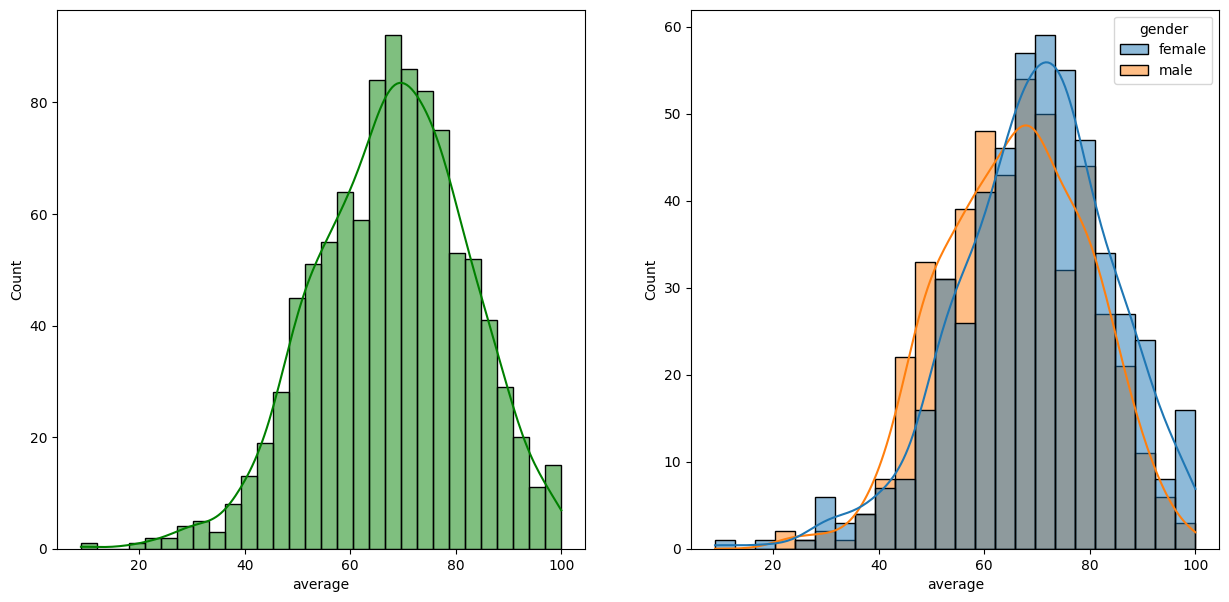

In [ ]:
#histogram for seeing distribution of avg
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data["average"],bins=30,color="g",kde=True)
plt.subplot(122)
sns.histplot(data=data,x="average",hue="gender",kde=True)
plt.show()

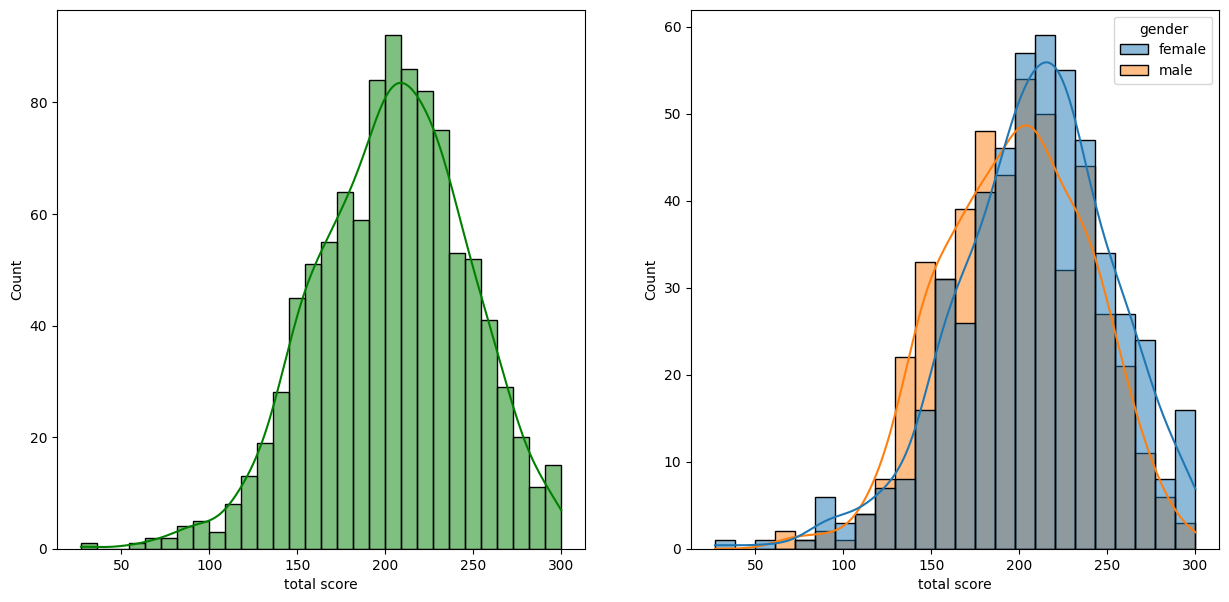

In [42]:
#dist for total score
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data["total score"],bins=30,color="g",kde=True)
plt.subplot(122)
sns.histplot(data=data,x="total score",hue="gender",kde=True)
plt.show()

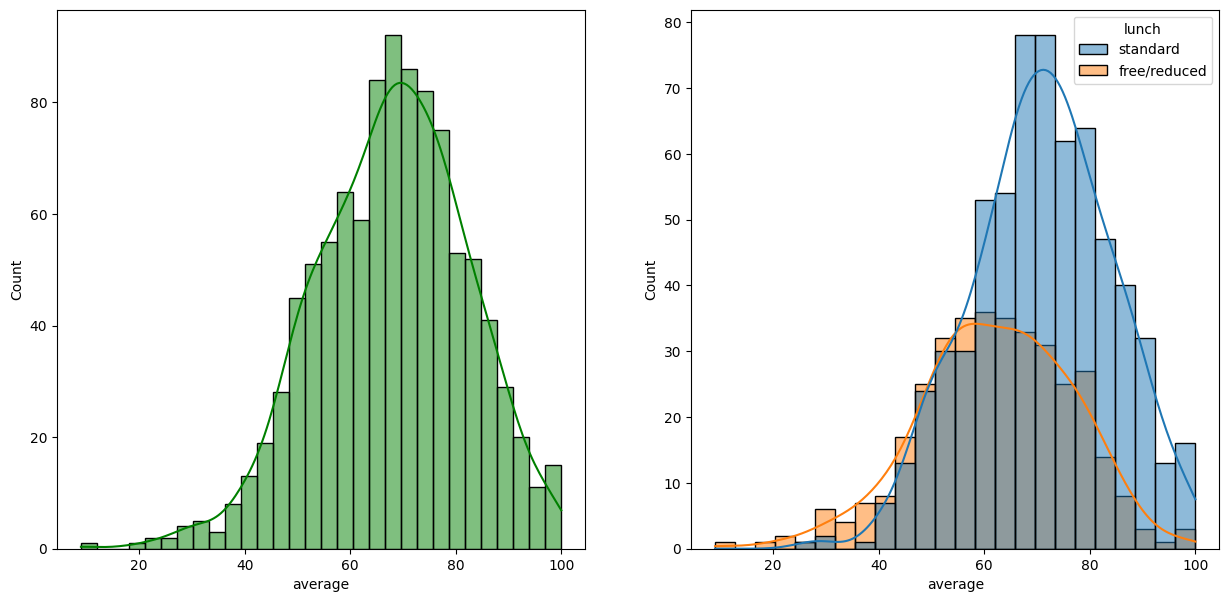

In [ ]:
#dist for lunch with respect to avg
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data["average"],bins=30,color="g",kde=True)
plt.subplot(122)
sns.histplot(data=data,x="average",hue="lunch",kde=True)
plt.show()